## Sharpe Ratio: What is it?
The Sharpe Ratio is a way of comparing investment returns, adjusting for units of risk. Risk is defined as the excess return per unit of deviation. Mathematically, it is represented as $$S(x) = \frac{r_x - R_f}{\sigma}$$ <br>
where $S(x)$ is the Sharpe Ratio of investment $x$, $r_x$ is the average return of investment $x$, and $R_f$ is the best available rate of return of a risk free security. In theory, very few things are risk free (such as treasury bills). I will use the S&P 500 as my "risk free" rate of return by applying the concept of the Central Limit Theorem. 

### Key Assumptions
1.) In this model, risk is measured by standard deviation (volatility) <br>
2.) The measurement interval is annual across all comparisons

In [11]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('datasets/stock_data.csv', parse_dates=['Date'], index_col = ['Date']).dropna()
benchmark_data = pd.read_csv('datasets/benchmark_data.csv', parse_dates=['Date'], index_col = ['Date']).dropna()

### Exploratory analysis

In [46]:
# Display summary for stock_data
print(stock_data.describe())
print(stock_data.head(), '\n')
print(stock_data.tail())


# Display summary for benchmark_data
print(benchmark_data.describe())
print(benchmark_data.head())


           Amazon    Facebook
count  252.000000  252.000000
mean   699.523135  117.035873
std     92.362312    8.899858
min    482.070007   94.160004
25%    606.929993  112.202499
50%    727.875000  117.765000
75%    767.882492  123.902503
max    844.359985  133.279999
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002 

                Amazon    Facebook
Date                              
2016-12-23  760.590027  117.269997
2016-12-27  771.400024  118.010002
2016-12-28  772.130005  116.919998
2016-12-29  765.150024  116.349998
2016-12-30  749.869995  115.050003
           S&P 500
count   252.000000
mean   2094.651310
std     101.427615
min    1829.080000
25%    2047.060000
50%    2104.105000
75%    2169.075000
max    2271.720000
            S&P 500
Date               
2016-01-04  2012.66
2016-01

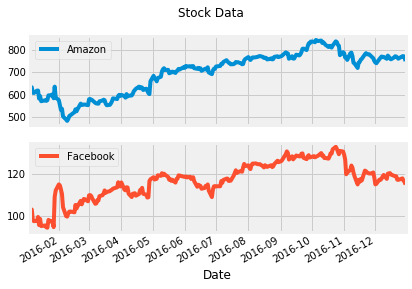

In [3]:
# visualize the stock_data
stock_data.plot(title = 'Stock Data', subplots=True);


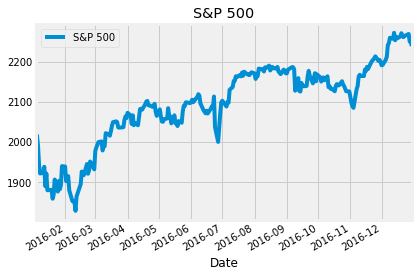

In [4]:
# plot the benchmark_data
benchmark_data.plot(title = 'S&P 500');


### Only a Sith deals in absolutes

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


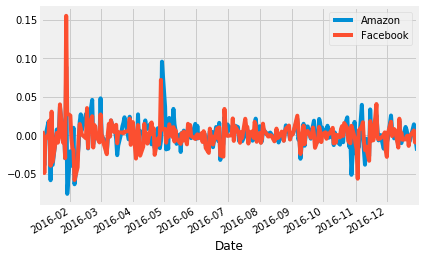

In [5]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()


# summarize the daily returns
stock_returns.describe()


count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

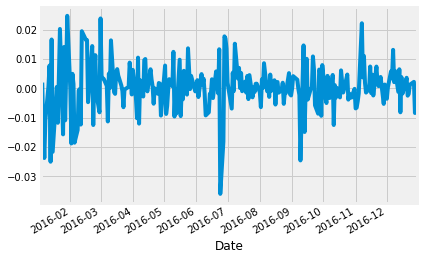

In [6]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot()


# summarize the daily returns
sp_returns.describe()

### Returns greater than the "risk free" return

,Amazon,Facebook
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.007036,0.002977
2016-01-06,0.011317,0.015452
2016-01-07,-0.015358,-0.025343
2016-01-08,0.009374,0.004813


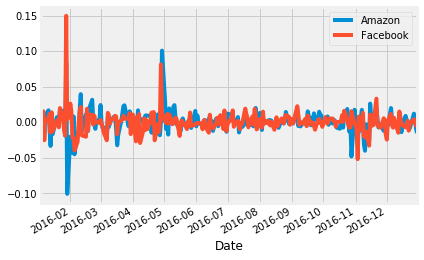

In [27]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

# plot the excess_returns
excess_returns.plot()


# summarize the excess_returns
excess_returns.describe()


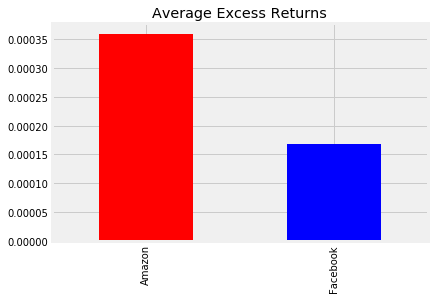

In [42]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns

avg_excess_return.plot.bar(title = 'Average Excess Returns', color='rb');


### Calculate risk

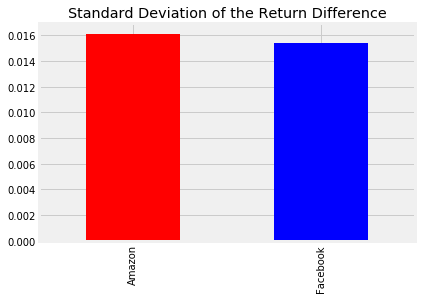

In [43]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference', color='rb');

### Annualize Sharpe Ratio assuming 5 work days per week and 52 weeks

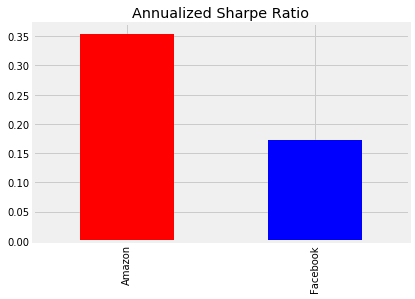

In [45]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio * annual_factor

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio', color='rb');